## Stochastic Discount Factor ##

Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:
$$
ln \tilde{g} = 0.02 + 0.02 \tilde{\epsilon} +\tilde{\nu}
$$
Here $\epsilon$ is a standard normal random variable, while $\nu$ is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

Simulate $\epsilon$  with (at least) 104 random draws from standard normal distribution, and simulate $\nu$ with (at least) 104 random draws from standard uniform distribution.

Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:

$$
\tilde{M} = 0.99\tilde{g}^{-\gamma}
$$

Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ). 

* Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

* Find the smallest value of γ (in your data) for which σM/μM > 0.4. Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.
Economic Significance:

* H–J bound: volatility ratio of pricing kernel must exceed Sharpe ratio of 0.4 for US stock market

* For investor with power utility of consumption, investor's coefficient of relative risk aversion (γ) affects volatility of pricing kernel ⇒ H–J bound sets lower bound on γ

* H–J bound is satisfied for reasonable value of γ when probability distribution of consumption growth includes rare disasters ⇒ no equity premium puzzle

In [1]:
import numpy as np
import scipy as sp
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Consumption Growth Function ##

$ln({\tilde{g}}) = 0.02 + 0.02{\tilde{\epsilon}} + {\tilde{\nu}}$

${\tilde{\epsilon}}$ is a standard normal random variable.

${\tilde{\nu}}$ is is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

In [2]:
no_of_draws = 100000

In [3]:
epsilon = np.random.standard_normal(no_of_draws)
epsilon

array([-0.43093536, -0.46821956, -0.17002529, ..., -0.29991695,
        1.07095086,  2.81588101])

In [4]:
nu = np.random.uniform(0, 1, no_of_draws)
pi = 0.017  # possibility of disaster
phi = 0.65  # disaster impact
for idx, elem in enumerate(nu):
    if elem <= pi:
        nu[idx] = np.log(phi)
    else:
        nu[idx] = 0

In [5]:
epsilon_nu_pair = list(zip(epsilon, nu))

In [6]:
g = []
for idx, elem in enumerate(epsilon_nu_pair):
    g.append(np.exp(0.02 + 0.02 * elem[0] + elem[1]))

## Pricing kernel for power utility ##
${\tilde{M}} =  0.99 {\tilde{g}}^{-\gamma}$

In [7]:
gamma = np.arange(1, 4.1, 0.10)

In [8]:
m_des_dict = {}
for possible_gamma in gamma:
    m = []
    for possible_g in g:
        m.append(0.99 * possible_g**-possible_gamma)
    m = np.array(m)
    # sigma_m/ mean_m for each possible gamma
    m_des_dict[round(possible_gamma, 2)] = m.std() / m.mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


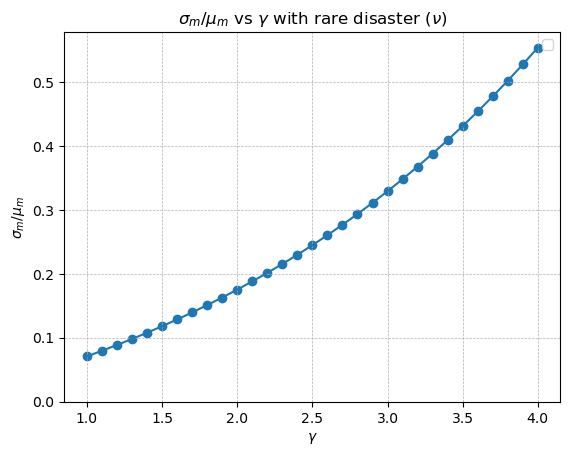

In [9]:
f1, ax1 = plt.subplots(1)
# f1.set_figheight(7)
# f1.set_figwidth(10)
ax1.scatter(m_des_dict.keys(), m_des_dict.values())
ax1.plot(m_des_dict.keys(), m_des_dict.values())
ax1.set_ylim(ymin=0)
# ax1.set_xlim(xmin=0)
ax1.set_xlabel(r"$\gamma$")
ax1.set_ylabel(r"$\sigma_m/\mu_m$")
# ax1.xaxis.set_major_locator(plt.MultipleLocator(0.025))
ax1.set_title(r"$\sigma_m/\mu_m$ vs $\gamma$ with rare disaster ($\nu$)")
ax1.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f %%"))
ax1.grid(linestyle="--", linewidth=0.5)
ax1.legend()
plt.show(f1)
f1.savefig("f1.jpg")

In [10]:
m_des_df = pd.DataFrame(m_des_dict.items(), columns=["gamma", "ratio"])
m_des_df = m_des_df.set_index("gamma")
# print(m_des_df.to_latex())

In [11]:
min_gamma = 5.0  # because max gamma is 4
for gamma, val in m_des_dict.items():
    # print(f"{float(gamma)} and {val}")
    if val > 0.4:
        if float(gamma) < min_gamma:
            min_gamma = float(gamma)
            print(f"minimum gamma is {min_gamma} with value equals {round(val,4)}")
            break

minimum gamma is 3.4 with value equals 0.4092
